# Kaggle - Categorical Feature Encoding Challenge - EDA
**Author: Chris Shin**

A common task in machine learning pipelines is encoding categorical variables for a given algorithm in a format that allows as much useful signal as possible to be captured.

Because this is such a common task and important skill to master, we've put together a dataset that contains only categorical features, and includes:

- binary features
- low- and high-cardinality nominal features
- low- and high-cardinality ordinal features
- (potentially) cyclical features

This Playground competition will give you the opportunity to try different encoding schemes for different algorithms to compare how they perform. We encourage you to share what you find with the community.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

In [3]:
train.shape, test.shape

((300000, 25), (200000, 24))

In [4]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [5]:
train = pd.read_csv('./data/train.csv', index_col='id')
test = pd.read_csv('./data/test.csv', index_col='id')
submission = pd.read_csv('./data/sample_submission.csv', index_col='id')

In [6]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


The data contains binary features (bin_*), nominal features (nom_*), ordinal features (ord_*) as well as (potentially cyclical) day (of the week) and month features. The string ordinal features ord_{3-5} are lexically ordered according to string.ascii_letters.

In [7]:
train.nunique()

bin_0         2
bin_1         2
bin_2         2
bin_3         2
bin_4         2
nom_0         3
nom_1         6
nom_2         6
nom_3         6
nom_4         4
nom_5       222
nom_6       522
nom_7      1220
nom_8      2215
nom_9     11981
ord_0         3
ord_1         5
ord_2         6
ord_3        15
ord_4        26
ord_5       192
day           7
month        12
target        2
dtype: int64

In [8]:
train.isna().sum()

bin_0     0
bin_1     0
bin_2     0
bin_3     0
bin_4     0
nom_0     0
nom_1     0
nom_2     0
nom_3     0
nom_4     0
nom_5     0
nom_6     0
nom_7     0
nom_8     0
nom_9     0
ord_0     0
ord_1     0
ord_2     0
ord_3     0
ord_4     0
ord_5     0
day       0
month     0
target    0
dtype: int64

Ordinal and nominal are two types of categorical data.

Nominal data is data that is divided into categories that do not have an inherent order or ranking. Examples of nominal data include gender, race, and country of origin.

Ordinal data is data that can be ranked or ordered based on a specific criterion. However, the distances between the categories may not be equal. Examples of ordinal data include education level (e.g. high school, bachelor's degree, master's degree) and rating scales (e.g. 1-5 star ratings).

In statistical analysis, the type of categorical data used will determine the appropriate tests and methods to use. Nominal data often requires the use of frequency distributions and contingency tables, while ordinal data can be analyzed using both frequency distributions and measures of central tendency such as the median.

In [9]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} unique values: {train[feature].unique()}')

ord_0 unique values: [2 1 3]
ord_1 unique values: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 unique values: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [10]:
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f'{feature} unique values: {train[feature].unique()}')

ord_3 unique values: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 unique values: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 unique values: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'y

In [11]:
print('day unique values:', train['day'].unique())
print('month unique values:', train['month'].unique())
print('target unique values:', train['target'].unique())

day unique values: [2 7 5 4 3 1 6]
month unique values: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target unique values: [0 1]


### Data Visualization

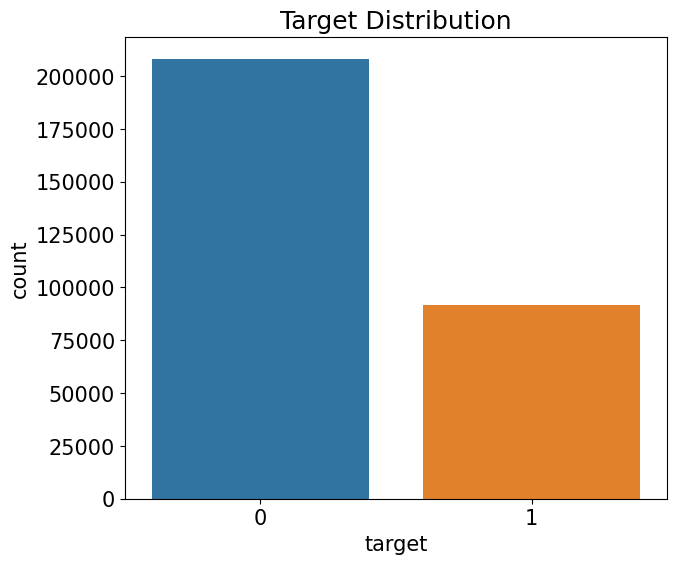

In [12]:
mpl.rc('font', size=15)
plt.figure(figsize=(7, 6))

ax = sns.countplot(x='target', data=train)
ax.set(title='Target Distribution');

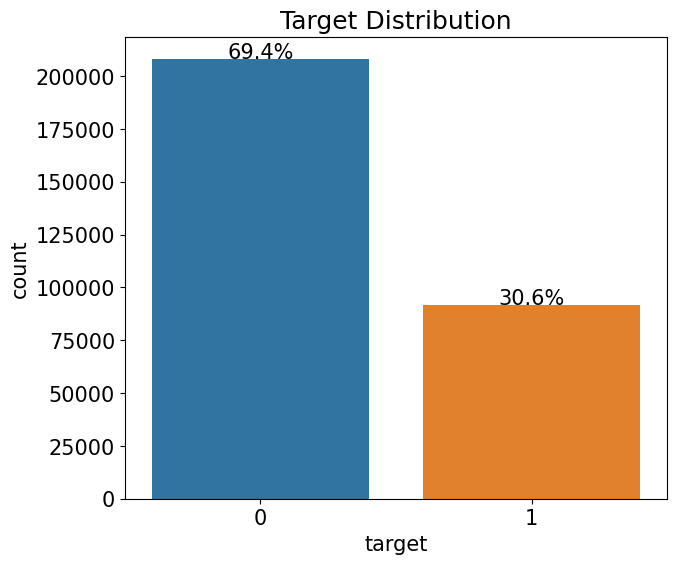

In [13]:
# Define a function to write percentage values on top of each bar in a bar plot
def write_percent(ax, total_size):
    # Iterate over each bar in the plot
    for patch in ax.patches:
        # Get the height, width, and left coordinate of the bar
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        # Calculate the percentage value of the bar
        percent = height/total_size*100
        # Write the percentage value on top of the bar
        ax.text(x=left_coord + width/2.0,
                y=height + total_size*0.001,
                s=f'{percent:1.1f}%',
                ha='center')

# Set the size of the plot
plt.figure(figsize=(7, 6))

# Create a countplot of the target variable in the train dataset
ax = sns.countplot(x='target', data=train)
# Write the percentage values on top of each bar in the plot
write_percent(ax, len(train))
# Set the title of the plot
ax.set_title('Target Distribution');

### Binary

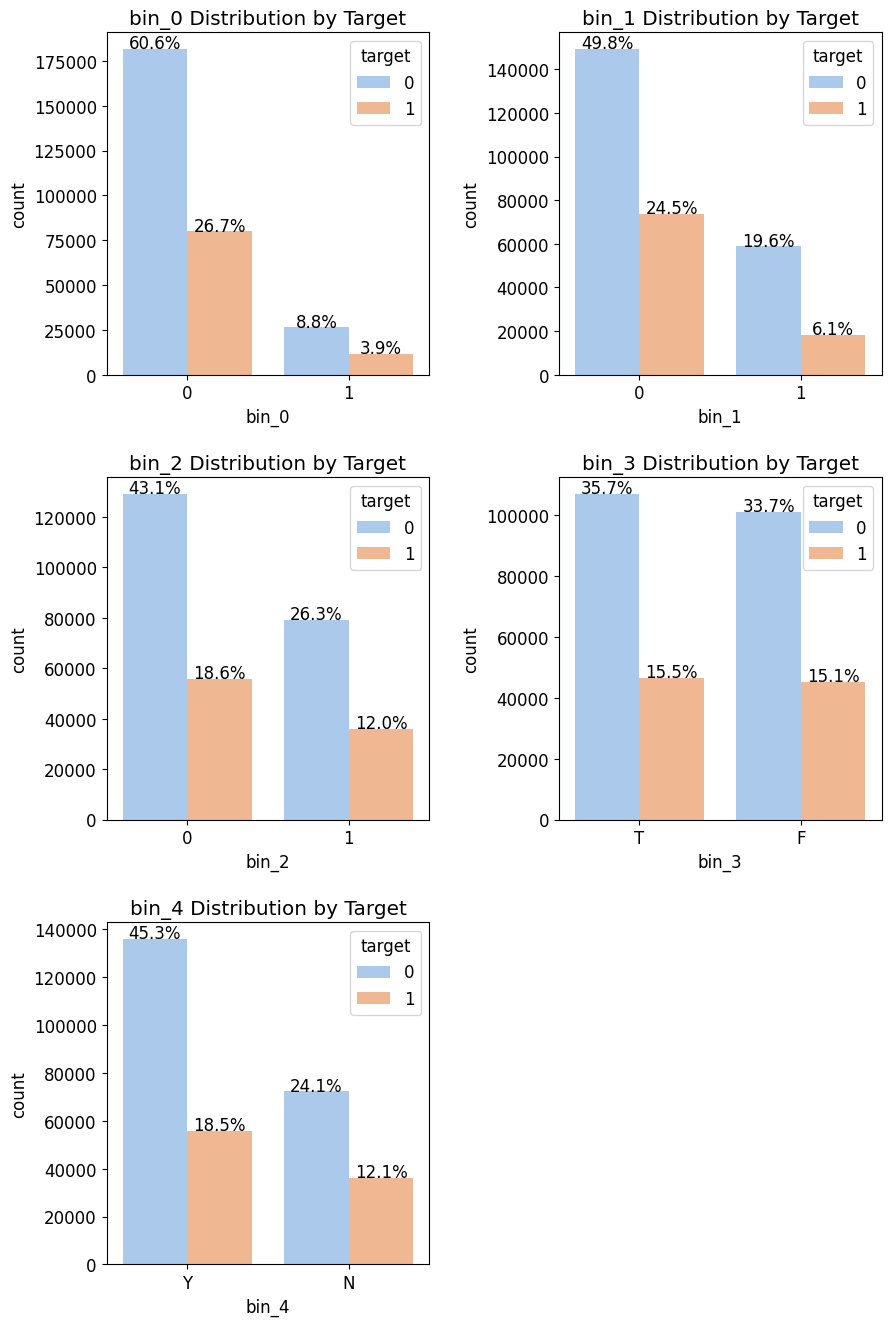

In [14]:
# Importing necessary libraries and modules
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

# Setting font size to 12
mpl.rc('font', size=12)

# Creating a 3x2 grid for subplots using gridspec
grid = gridspec.GridSpec(3, 2)

# Creating a figure with size 10x16 and adjusting the spacing between subplots
plt.figure(figsize=(10, 16))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

# Selecting binary features to plot
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

# Looping over the selected binary features
for idx, feature in enumerate(bin_features):
    
    # Creating a subplot for each feature
    ax = plt.subplot(grid[idx])
    
    # Creating a countplot for the feature with hue as the target variable
    sns.countplot(x=feature,
                  data=train,
                  hue='target',
                  palette='pastel',
                  ax=ax)
    
    # Setting the title of the subplot to the feature name
    ax.set_title(f'{feature} Distribution by Target')
    
    # Writing percentage text on the countplot
    write_percent(ax, len(train))

### Categorical

##### Nominal

In [15]:
# Define a function named "get_crosstab" that takes two arguments: a DataFrame and a feature
def get_crosstab(df, feature):
    # Use the "crosstab" method of the pandas library to compute a contingency table between two factors
    # Here, the factors are the "feature" column and the "target" column
    # Normalize the table by row, and multiply it by 100 to get percentages
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100
    # Reset the index of the DataFrame to include the "feature" column
    crosstab = crosstab.reset_index()
    # Return the resulting DataFrame
    return crosstab

In [16]:
crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [17]:
# Define a function that plots a pointplot with a twinx axis
def plot_pointplot(ax, feature, crosstab):
    
    # Create a twinx axis for the pointplot
    ax = ax.twinx()
    
    # Create a pointplot on the twinx axis, using the input feature and crosstab data
    ax = sns.pointplot(x=feature, y=1, data=crosstab,
                        order=crosstab[feature].values,
                        color='black'
                        )
    
    # Set the y-axis limits for the twinx axis based on the crosstab data
    ax.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)
    
    # Set the label for the y-axis of the twinx axis
    ax.set_ylabel('Target 1 Ratio(%)')


In [18]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15, 20)):
    # Create a figure with the specified size and gridspec layout
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=0.45, hspace=0.3)

    # Iterate through the specified features
    for idx, feature in enumerate(features): 
        # Create a subplot for the current feature
        ax = plt.subplot(grid[idx])
        
        # Get the crosstabulation of the current feature and target variable
        crosstab = get_crosstab(df, feature)
        
        # Plot the countplot of the current feature, ordered by the index of the crosstabulation
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)

        # Write the percentage of each category on top of each bar
        write_percent(ax, len(df))
        
        # Plot the pointplot of the target variable's true ratio over the current feature
        plot_pointplot(ax, feature, crosstab)
        
        # Set the title of the subplot to the current feature's name
        ax.set_title(f'{feature} Distribution')

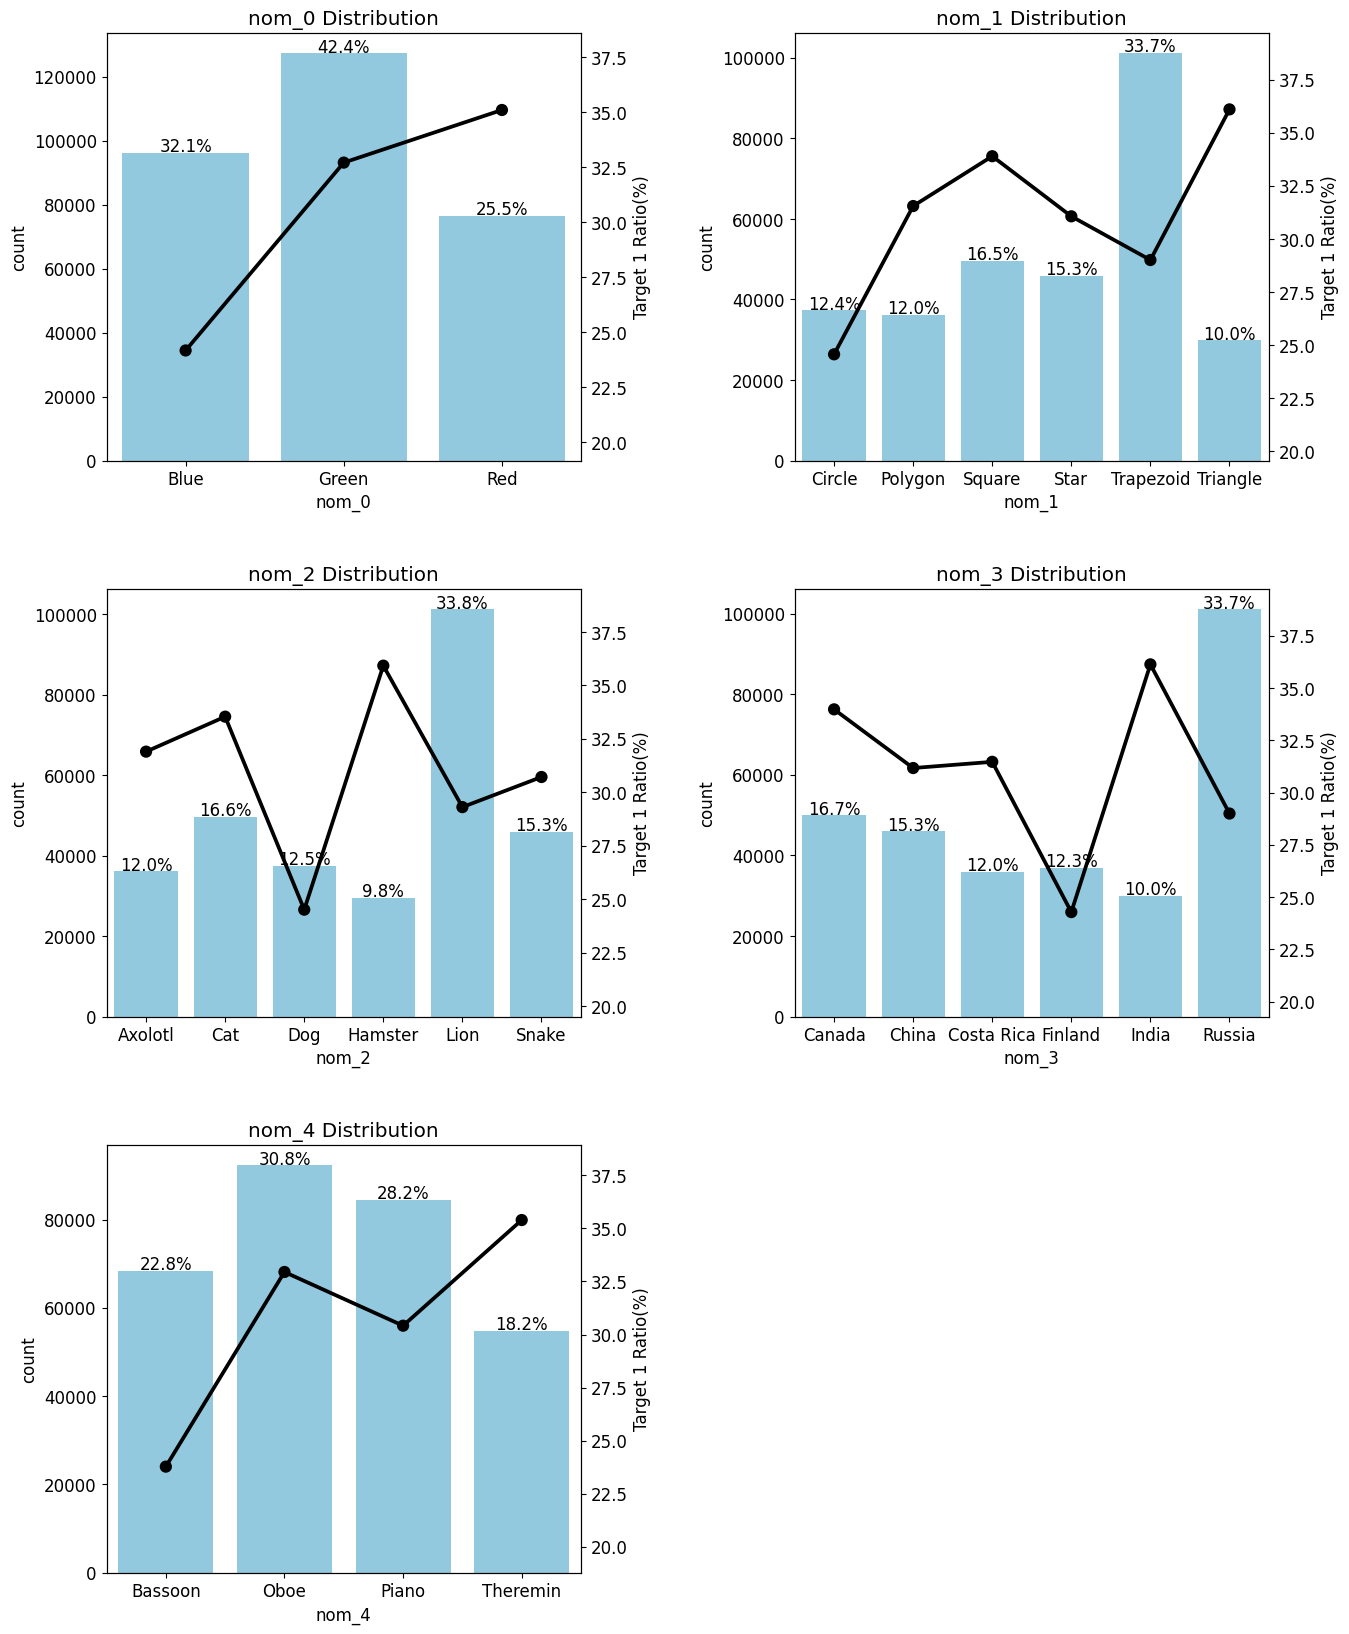

In [19]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

In [20]:
for i in range(5, 10):
    feature = 'nom_' + str(i)
    print(f'{feature} nunique values: {train[feature].nunique()}')

nom_5 nunique values: 222
nom_6 nunique values: 522
nom_7 nunique values: 1220
nom_8 nunique values: 2215
nom_9 nunique values: 11981


In [21]:
for i in range(5, 10):
    feature = 'nom_' + str(i)
    print(f'{feature} unique values: {train[feature].unique()}')

nom_5 unique values: ['50f116bcf' 'b3b4d25d0' '3263bdce5' 'f12246592' '5b0f5acd5' '46cab09da'
 'be5592604' '72f8028dc' '4604905e7' 'ad95dc0ee' '2ff007c26' 'a35c346aa'
 'dbfb714a4' 'e1558b071' '39647c92a' 'ee55b9d67' '416a8f3ab' '91bde92fa'
 '3aa9329e2' '568550f04' 'caf83c0b5' '908a1b9c9' 'e844a1f66' 'dbc448931'
 '2979f0d45' '96c73114c' 'b7bb45938' '7da3e4aec' 'be4578201' 'dc07effb0'
 '88917a066' 'f2d59cf51' '5d18641ff' '9347491f2' '475e79160' 'e70a6270d'
 '5b1a9f841' 'e0efe9d20' 'd1b1709e8' '9bb7ea2da' '6fec43dd8' '0dee9b39a'
 '527ded12a' '321bf770e' 'f7821e391' '0de4acd31' '185ba0a59' '4845cc770'
 'bdb9fef4a' '3fef1a765' '2cc9e16b9' 'fd04a970f' '81f9d3312' '30a15b6bd'
 '8dcf8adfb' '83b38aa6b' '74bd42d5f' '5a94fc1d9' '4e1b529f6' '8d5d9f3db'
 '472efea17' '740fb99a9' '075ceb58b' '0ef5c1879' '640e1fdd5' 'a3f640358'
 'c5725677e' '3b5632a0c' '534be2753' '30a530eab' '7ee26092e' 'c0534106d'
 '713ad10a7' '9ad6558d1' 'ef38568df' 'de04b8750' 'bd40c81f3' 'ade526ba7'
 '4e28ceffa' '1305d6e77' '3585

##### Ordinal

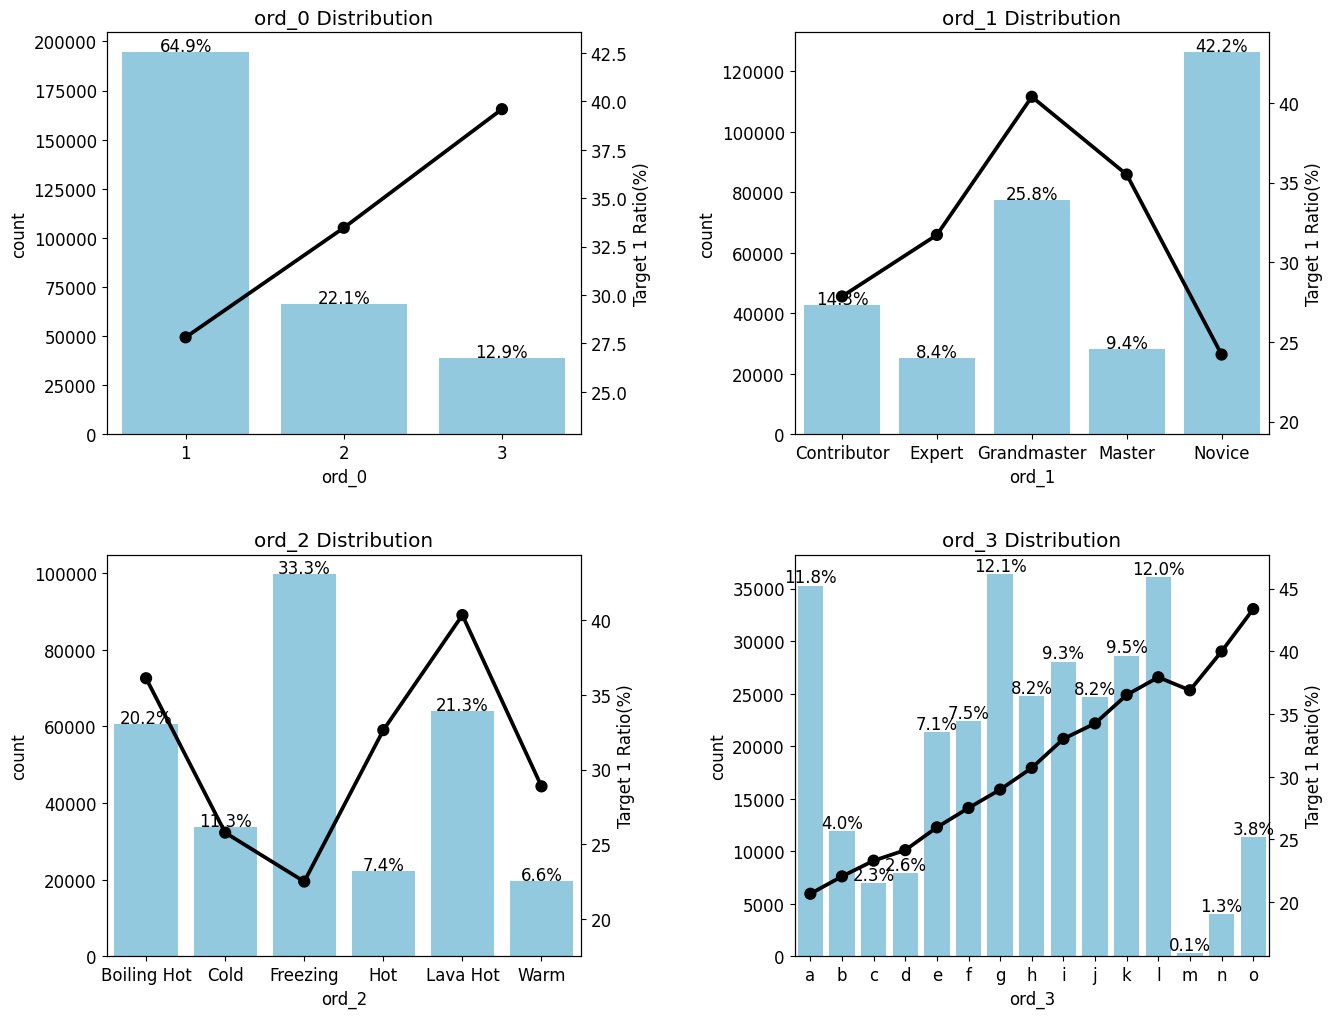

In [22]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
plot_cat_dist_with_true_ratio(train, ord_features, 
                              num_rows=2, num_cols=2, size=(15, 12))

In [23]:
from pandas.api.types import CategoricalDtype 

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

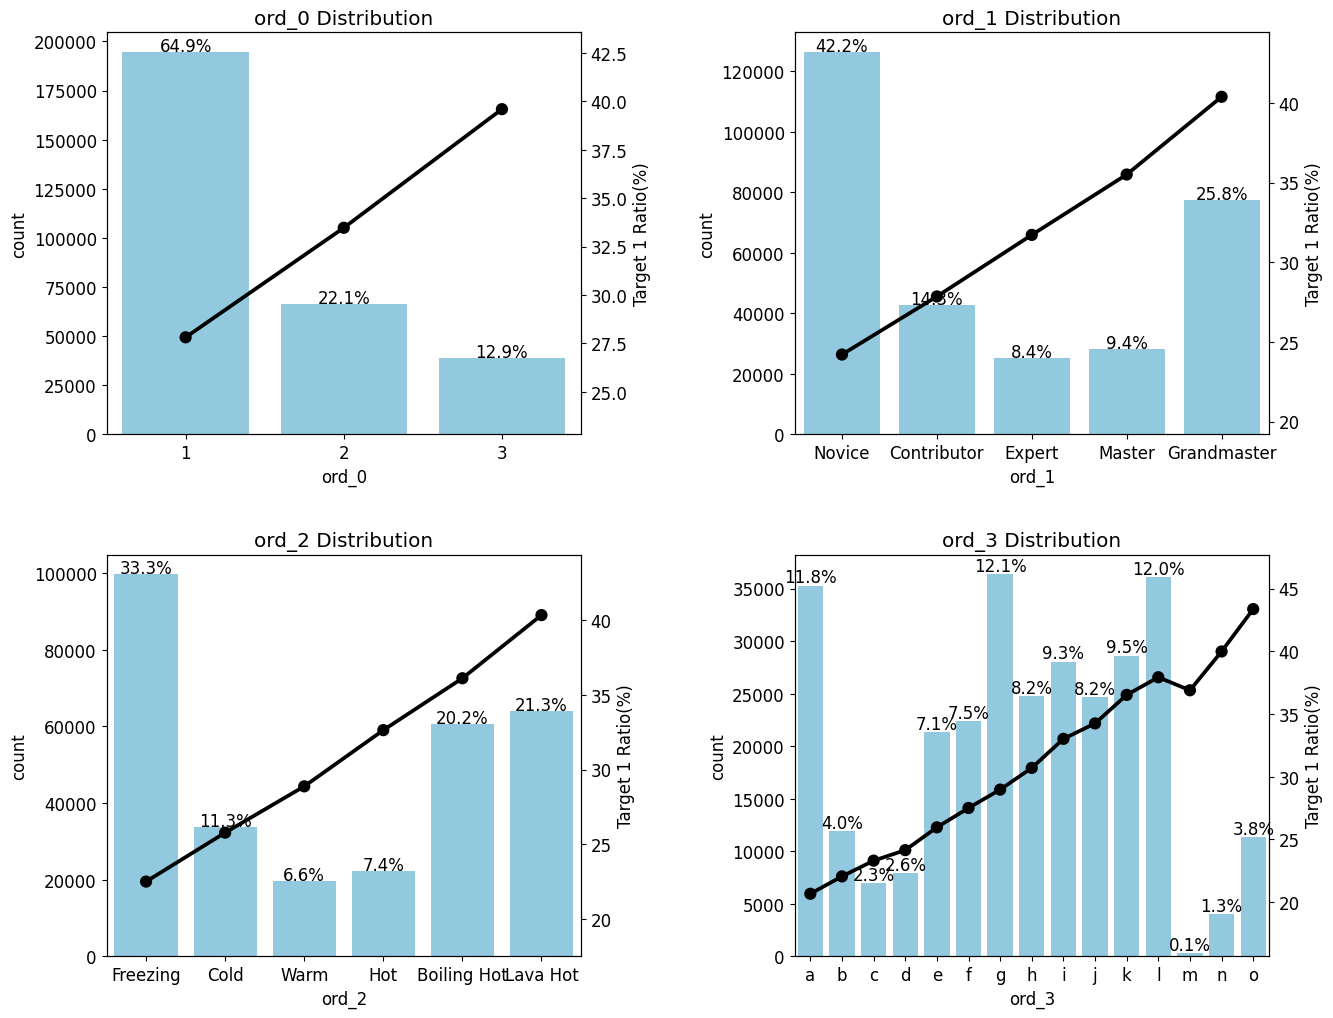

In [24]:
plot_cat_dist_with_true_ratio(train, ord_features, 
                              num_rows=2, num_cols=2, size=(15, 12))

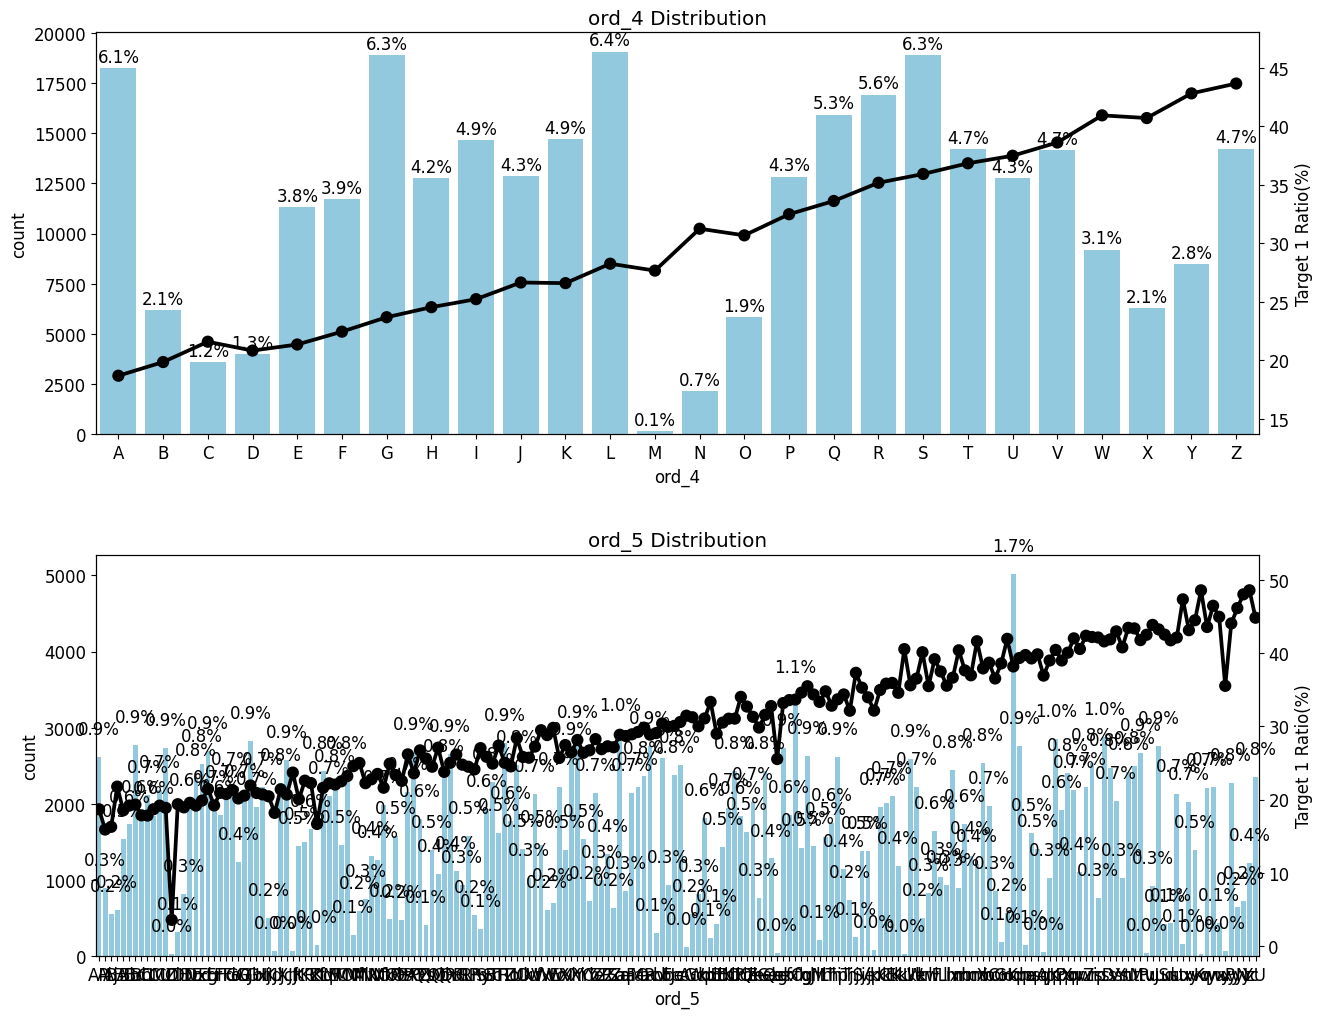

In [25]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'], 
                              num_rows=2, num_cols=1, size=(15, 12))

##### Date

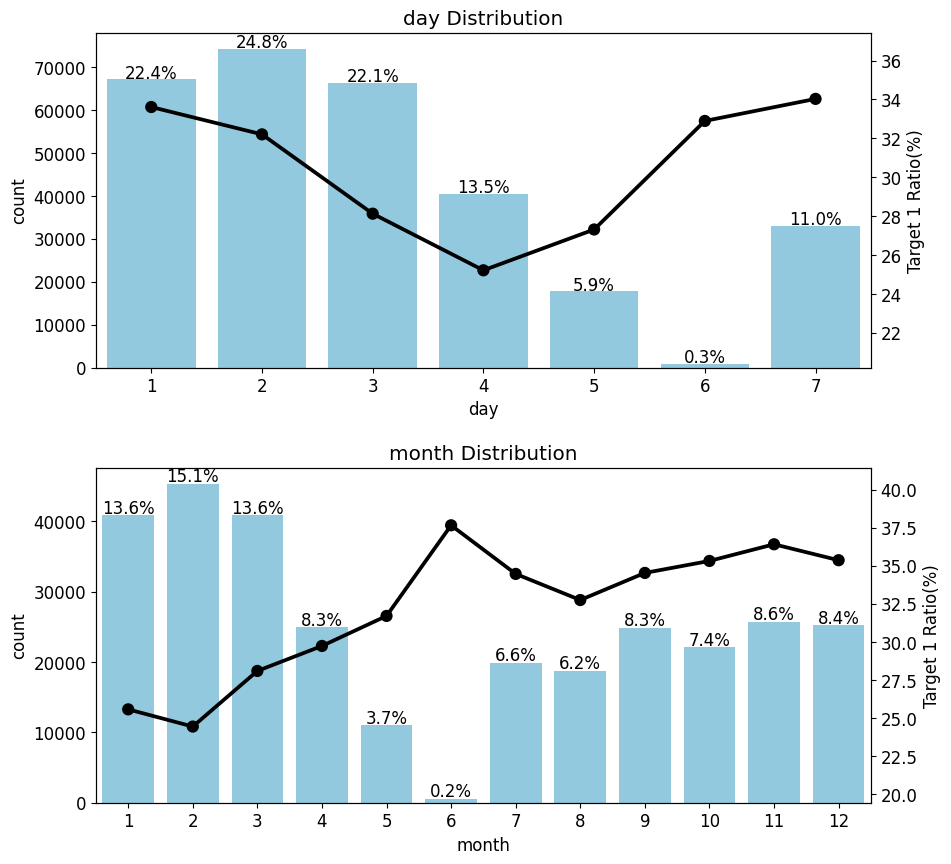

In [26]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, 
                              num_rows=2, num_cols=1, size=(10, 10))

In [27]:
train['nom_5'].head()

id
0    50f116bcf
1    b3b4d25d0
2    3263bdce5
3    f12246592
4    5b0f5acd5
Name: nom_5, dtype: object

In [28]:
import category_encoders as ce

pd.options.display.max_columns = 50

encoder = ce.HashingEncoder(cols=['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9'], n_components=10)
train_encoded = encoder.fit_transform(train)
train_encoded

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,0,0,0,1,2,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,0,1,0,0,0,2,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,1,0,1,0,2,1,0,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,2,0,0,0,1,0,0,1,1,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,2,0,0,0,0,1,2,0,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,1,Grandmaster,Freezing,a,R,qP,7,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,1,1,0,0,2,1,0,0,0,0,T,N,Red,Trapezoid,Snake,India,Oboe,1,Contributor,Freezing,k,K,dh,3,8,0
299996,0,1,0,0,1,1,0,2,0,0,0,0,0,F,Y,Green,Trapezoid,Lion,Russia,Piano,2,Novice,Freezing,h,W,MO,3,2,0
299997,0,0,0,1,1,1,1,0,0,1,0,0,0,F,Y,Blue,Star,Axolotl,Russia,Oboe,3,Novice,Boiling Hot,o,A,Bn,7,9,1


In [29]:
train

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,T,N,Red,Trapezoid,Snake,India,Oboe,35f65a9bf,788ba7aea,86a8e4ca0,7508f4ef1,e027decef,1,Contributor,Freezing,k,K,dh,3,8,0
299996,0,0,0,F,Y,Green,Trapezoid,Lion,Russia,Piano,472efea17,3b9693870,c4455f4a8,397dd0274,80f1411c8,2,Novice,Freezing,h,W,MO,3,2,0
299997,0,0,0,F,Y,Blue,Star,Axolotl,Russia,Oboe,0dee9b39a,6046454de,ba9901303,5d7806f53,314dcc15b,3,Novice,Boiling Hot,o,A,Bn,7,9,1


In [30]:
temp = train.copy()

In [31]:
for i in range(5, 10):
    feature = 'nom_' + str(i)
    temp[feature] = temp[feature].apply(lambda x: int(x, 16))

In [32]:
temp[['nom_' + str(i) for i in range(5, 10)]].describe()

,nom_5,nom_6,nom_7,nom_8,nom_9
count,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05
mean,3.321701e+10,3.508670e+10,3.541843e+10,3.442490e+10,3.437075e+10
std,2.015973e+10,2.020640e+10,2.013648e+10,1.986806e+10,1.985529e+10
min,9.838922e+07,9.764790e+05,1.224483e+08,1.141860e+07,5.375245e+06
25%,1.574667e+10,1.671517e+10,1.853840e+10,1.793355e+10,1.723630e+10
50%,3.086170e+10,3.572793e+10,3.577884e+10,3.440905e+10,3.426590e+10
75%,5.092933e+10,5.375779e+10,5.289387e+10,5.173298e+10,5.172963e+10
max,6.791906e+10,6.865871e+10,6.869903e+10,6.871913e+10,6.871678e+10


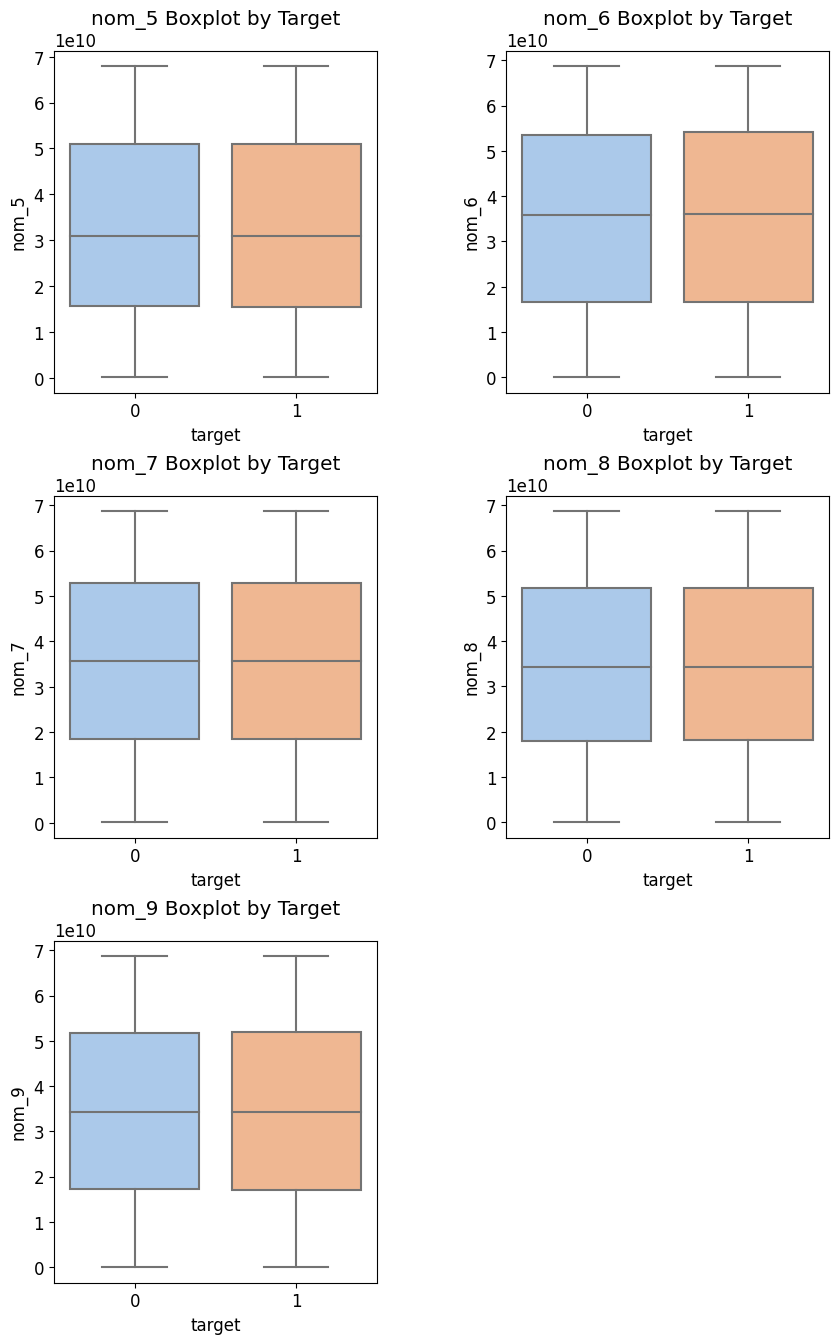

In [33]:
# Importing necessary libraries and modules
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

# Setting font size to 12
mpl.rc('font', size=12)

# Creating a 3x2 grid for subplots using gridspec
grid = gridspec.GridSpec(3, 2)

# Creating a figure with size 10x16 and adjusting the spacing between subplots
plt.figure(figsize=(10, 16))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

# Selecting binary features to plot
bin_features = ['nom_' + str(i) for i in range(5, 10)]

# Looping over the selected binary features
for idx, feature in enumerate(bin_features):
    
    # Creating a subplot for each feature
    ax = plt.subplot(grid[idx])
    
    # Creating a countplot for the feature with hue as the target variable
    sns.boxplot(y=feature,
                  data=temp,
                  x='target',
                  palette='pastel',
                  ax=ax)
    
    # Setting the title of the subplot to the feature name
    ax.set_title(f'{feature} Boxplot by Target')

In [34]:
import math

for i in range(5, 10):
    feature = 'nom_' + str(i)
    temp[feature] = temp[feature].apply(lambda x: math.ceil(x/10000000000))

In [35]:
temp[['nom_' + str(i) for i in range(5, 10)]].describe()

,nom_5,nom_6,nom_7,nom_8,nom_9
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,3.829087,4.022113,4.053430,3.953867,3.946130
std,2.010200,1.995247,2.005106,1.981097,1.977667
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000


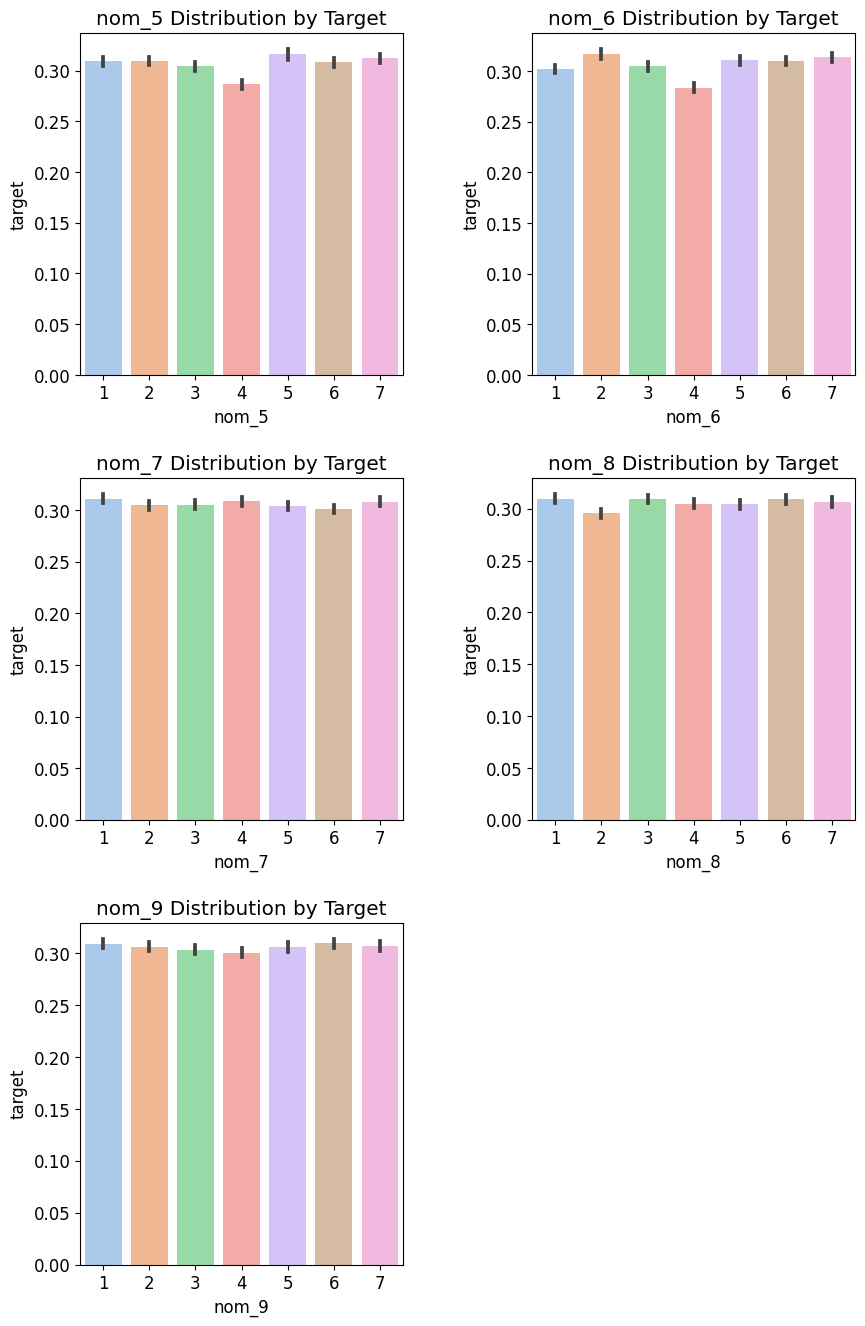

In [36]:
# Importing necessary libraries and modules
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

# Setting font size to 12
mpl.rc('font', size=12)

# Creating a 3x2 grid for subplots using gridspec
grid = gridspec.GridSpec(3, 2)

# Creating a figure with size 10x16 and adjusting the spacing between subplots
plt.figure(figsize=(10, 16))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

# Selecting binary features to plot
nom_features = ['nom_' + str(i) for i in range(5, 10)]

# Looping over the selected binary features
for idx, feature in enumerate(nom_features):
    
    # Creating a subplot for each feature
    ax = plt.subplot(grid[idx])
    
    # Creating a countplot for the feature with hue as the target variable
    sns.barplot(x=feature,
                  data=temp,
                  y='target',
                  palette='pastel',
                  ax=ax)
    
    # Setting the title of the subplot to the feature name
    ax.set_title(f'{feature} Distribution by Target')
    
    # Writing percentage text on the countplot
    # write_percent(ax, len(train))

In [37]:
hex_df = train.loc[:,"nom_5":"nom_9"]
hex_1 = lambda x: int(bin(int(x,16))[2:].zfill(36)[:9],2)
hex_2 = lambda x: int(bin(int(x,16))[2:].zfill(36)[9:18],2)
hex_3 = lambda x: int(bin(int(x,16))[2:].zfill(36)[18:27],2)
hex_4 = lambda x: int(bin(int(x,16))[2:].zfill(36)[27:],2)
new_ord_df = pd.DataFrame()
for col in hex_df:
    new_ord_df['%s_1'%col] = hex_df[col].apply(hex_1)
    new_ord_df['%s_2'%col] = hex_df[col].apply(hex_2)
    new_ord_df['%s_3'%col] = hex_df[col].apply(hex_3)
    new_ord_df['%s_4'%col] = hex_df[col].apply(hex_4)
train.drop(hex_df.columns,axis=1,inplace=True)
new_train = pd.concat([train,new_ord_df],axis=1)

In [38]:
new_train

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,nom_5_1,nom_5_2,nom_5_3,nom_5_4,nom_6_1,nom_6_2,nom_6_3,nom_6_4,nom_7_1,nom_7_2,nom_7_3,nom_7_4,nom_8_1,nom_8_2,nom_8_3,nom_8_4,nom_9_1,nom_9_2,nom_9_3,nom_9_4
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,2,Grandmaster,Cold,h,D,kr,2,2,0,161,452,181,463,117,262,452,20,209,474,361,489,391,36,0,171,94,306,414,337
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,1,Grandmaster,Hot,a,A,bF,7,8,0,359,211,146,464,503,301,135,449,118,439,171,18,153,356,257,81,496,241,182,33
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,1,Expert,Lava Hot,h,R,Jc,7,2,0,100,398,494,229,18,139,286,184,333,141,378,295,445,114,251,132,348,416,6,464
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1,482,137,50,402,161,350,362,106,472,420,283,235,149,377,341,361,260,451,390,369
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,1,Grandmaster,Freezing,a,R,qP,7,8,0,182,61,214,213,63,389,464,509,9,374,353,190,406,270,344,373,354,402,441,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,T,N,Red,Trapezoid,Snake,India,Oboe,1,Contributor,Freezing,k,K,dh,3,8,0,107,473,212,447,241,46,317,234,269,163,294,160,234,35,423,241,448,159,246,239
299996,0,0,0,F,Y,Green,Trapezoid,Lion,Russia,Piano,2,Novice,Freezing,h,W,MO,3,2,0,142,187,501,23,119,90,156,112,392,277,250,168,114,503,129,116,257,453,8,456
299997,0,0,0,F,Y,Blue,Star,Axolotl,Russia,Oboe,3,Novice,Boiling Hot,o,A,Bn,7,9,1,27,442,217,410,192,281,42,222,373,100,9,259,186,480,55,339,98,311,96,347


In [39]:
temp_test = test.copy()

In [43]:
hex_df.index

Int64Index([300000, 300001, 300002, 300003, 300004, 300005, 300006, 300007,
            300008, 300009,
            ...
            499990, 499991, 499992, 499993, 499994, 499995, 499996, 499997,
            499998, 499999],
           dtype='int64', name='id', length=200000)

In [44]:
new_ord_df

,nom_5_1,nom_5_2,nom_5_3,nom_5_4,nom_6_1,nom_6_2,nom_6_3,nom_6_4,nom_7_1,nom_7_2,nom_7_3,nom_7_4,nom_8_1,nom_8_2,nom_8_3,nom_8_4,nom_9_1,nom_9_2,nom_9_3,nom_9_4
id,,,,,,,,,,,,,,,,,,,,
0,161,452,181,463,117,262,452,20,209,474,361,489,391,36,0,171,94,306,414,337
1,359,211,146,464,503,301,135,449,118,439,171,18,153,356,257,81,496,241,182,33
2,100,398,494,229,18,139,286,184,333,141,378,295,445,114,251,132,348,416,6,464
3,482,137,50,402,161,350,362,106,472,420,283,235,149,377,341,361,260,451,390,369
4,182,61,214,213,63,389,464,509,9,374,353,190,406,270,344,373,354,402,441,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,107,473,212,447,241,46,317,234,269,163,294,160,234,35,423,241,448,159,246,239
299996,142,187,501,23,119,90,156,112,392,277,250,168,114,503,129,116,257,453,8,456
299997,27,442,217,410,192,281,42,222,373,100,9,259,186,480,55,339,98,311,96,347


In [45]:
new_ord_df.set_index(hex_df.index)

ValueError: Length mismatch: Expected 300000 rows, received array of length 200000

In [46]:
hex_df = temp_test.loc[:,"nom_5":"nom_9"]
hex_1 = lambda x: int(bin(int(x,16))[2:].zfill(36)[:9],2)
hex_2 = lambda x: int(bin(int(x,16))[2:].zfill(36)[9:18],2)
hex_3 = lambda x: int(bin(int(x,16))[2:].zfill(36)[18:27],2)
hex_4 = lambda x: int(bin(int(x,16))[2:].zfill(36)[27:],2)
new_ord_df = pd.DataFrame()
for col in hex_df:
    new_ord_df['%s_1'%col] = hex_df[col].apply(hex_1)
    new_ord_df['%s_2'%col] = hex_df[col].apply(hex_2)
    new_ord_df['%s_3'%col] = hex_df[col].apply(hex_3)
    new_ord_df['%s_4'%col] = hex_df[col].apply(hex_4)
temp_test.drop(hex_df.columns,axis=1,inplace=True)
new_ord_df = new_ord_df.set_index(hex_df.index)
new_test = pd.concat([temp_test,new_ord_df],axis=1)

In [47]:
new_test

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,nom_5_1,nom_5_2,nom_5_3,nom_5_4,nom_6_1,nom_6_2,nom_6_3,nom_6_4,nom_7_1,nom_7_2,nom_7_3,nom_7_4,nom_8_1,nom_8_2,nom_8_3,nom_8_4,nom_9_1,nom_9_2,nom_9_3,nom_9_4
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,2,Novice,Warm,j,P,be,5,11,16,450,389,93,313,428,206,470,166,62,118,195,314,69,409,12,120,294,417,184
300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,1,Master,Lava Hot,l,A,RP,7,5,331,265,434,393,53,349,33,66,37,408,176,457,141,184,386,412,80,349,392,117
300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,2,Expert,Freezing,a,G,tP,1,12,173,21,135,260,63,389,464,509,79,347,248,63,366,359,272,496,222,200,482,319
300003,0,0,1,T,Y,Red,Star,Cat,China,Piano,1,Contributor,Lava Hot,b,Q,ke,2,3,394,457,179,382,332,336,359,192,97,280,478,268,22,443,52,255,363,376,494,196
300004,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,3,Grandmaster,Lava Hot,l,W,qK,4,11,462,41,275,269,303,218,282,280,328,142,48,101,498,124,472,494,300,499,468,457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,1,Novice,Lava Hot,j,A,Gb,1,3,217,67,448,461,328,26,303,274,416,169,344,186,316,300,280,352,345,268,148,287
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,1,Contributor,Lava Hot,f,S,Ed,2,2,90,390,200,226,164,32,54,226,421,355,341,475,415,246,63,208,469,397,35,208
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,1,Novice,Boiling Hot,g,V,TR,3,1,145,16,51,89,80,401,186,331,69,12,255,510,34,34,486,364,103,372,487,331
